In [ ]:
import tensorflow as tf

tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

<Dense name=dense, built=False>

# Leaky ReLu

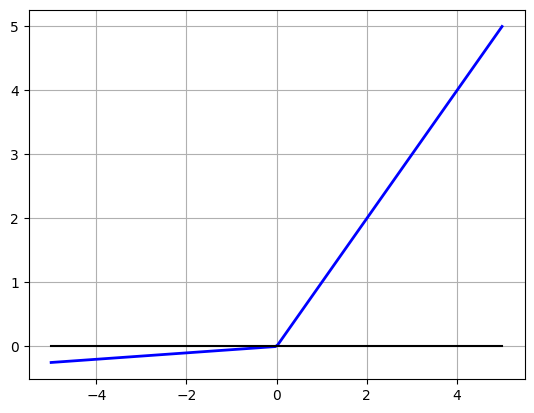

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(z, alpha=0.01):
  return np.maximum(alpha*z, z)

z = np.linspace(-5, 5, 200)

plt.plot(z, leaky_relu(z, 0.05), 'b-', linewidth=2)
plt.grid()
plt.plot([-5,5], [0,0], 'k-');

In [ ]:
leaky_relu = tf.keras.layers.LeakyReLU(negative_slope=0.05)
tf.keras.layers.Dense(10, activation=leaky_relu,
                      kernel_initializer='he_normal')

<Dense name=dense_1, built=False>

In [ ]:
tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='leaky_relu', kernel_initializer='he_normal')
])

<Sequential name=sequential, built=False>

In [ ]:
tf.keras.Sequential([
    tf.keras.layers.Dense(10, kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(alpha=0.05)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


<Sequential name=sequential_1, built=False>

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, kernel_initializer='he_normal'),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dense(100, activation='leaky_relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']

)

model.fit(X_train, y_train, epochs=5, validation_data = [X_valid, y_valid])

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7906 - loss: 0.5945 - val_accuracy: 0.8372 - val_loss: 0.4205
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8621 - loss: 0.3788 - val_accuracy: 0.8452 - val_loss: 0.3945
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8769 - loss: 0.3337 - val_accuracy: 0.8482 - val_loss: 0.4015
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8859 - loss: 0.3058 - val_accuracy: 0.8634 - val_loss: 0.3698
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8936 - loss: 0.2851 - val_accuracy: 0.8646 - val_loss: 0.3670


# ELU

In [ ]:
tf.keras.layers.Dense(10, activation='elu', kernel_initializer='he_normal')

<Dense name=dense_3, built=False>

# SELU

In [ ]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means)/ pixel_stds
X_valid_scaled = (X_valid - pixel_means)/ pixel_stds
X_test_scaled = (X_test - pixel_means)/ pixel_stds

In [ ]:
dense = tf.keras.layers.Dense(50, activation='selu', kernel_initializer='lecun_normal')

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())

for i in range(100):
  model.add(tf.keras.layers.Dense(100, activation='selu',
                                  kernel_initializer='lecun_normal'))

model.add(tf.keras.layers.Dense(10, activation='softmax',
                                kernel_initializer='glorot_normal'))

In [ ]:
class_names = ['T-shirt', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = [tf.keras.metrics.sparse_categorical_accuracy]
)
model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - loss: 2.1527 - sparse_categorical_accuracy: 0.1856 - val_loss: 2.0038 - val_sparse_categorical_accuracy: 0.2658
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - loss: 1.9985 - sparse_categorical_accuracy: 0.2472 - val_loss: 1.9497 - val_sparse_categorical_accuracy: 0.2804
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - loss: 1.9602 - sparse_categorical_accuracy: 0.2594 - val_loss: 1.8989 - val_sparse_categorical_accuracy: 0.2748
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - loss: 1.8624 - sparse_categorical_accuracy: 0.2834 - val_loss: 1.7731 - val_sparse_categorical_accuracy: 0.2196
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 1.7321 - sparse_categorical_accuracy: 0.2593 - val_loss: 1.5691 - val_sparse_categorical_accuracy: 0.3552


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())

for i in range(100):
  model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'))

model.add(tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal'))

In [ ]:
model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5, validation_data=[X_valid_scaled, y_valid])

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.1632 - loss: 2.1413 - val_accuracy: 0.1030 - val_loss: 2.3056
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.1057 - loss: 2.2921 - val_accuracy: 0.3166 - val_loss: 1.6001
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.2753 - loss: 1.6332 - val_accuracy: 0.3812 - val_loss: 1.3952
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.1625 - loss: 2.1109 - val_accuracy: 0.0994 - val_loss: 2.3053
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.1086 - loss: 2.2861 - val_accuracy: 0.0994 - val_loss: 2.3054


# Batch Normalization

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal')
])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_207 (Dense)                    │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_208 (Dense)                    │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_209 (Dense)                    │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [ ]:
[(var.name, var.trainable)for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=2, validation_data = [X_valid, y_valid])

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.5806 - loss: 1.2764 - val_accuracy: 0.7970 - val_loss: 0.5898
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7845 - loss: 0.6313 - val_accuracy: 0.8194 - val_loss: 0.5039


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, kernel_initializer='he_normal', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(100, kernel_initializer='he_normal', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal')
])
# paperde tovsiye olunan usul

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics =['accuracy'])

model.fit(X_train, y_train, epochs=2, validation_data=[X_valid, y_valid])

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8005 - loss: 0.5724 - val_accuracy: 0.8520 - val_loss: 0.3789
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8729 - loss: 0.3525 - val_accuracy: 0.8720 - val_loss: 0.3445


# Gradient Clipping

In [ ]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)  #hamisi 1-den boyuk gradientleri 1-e = eleyir
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

In [ ]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0) # nisbeti saxlayir(10-0.1, 100-1)
model.compile(loss='spare_categorical_crossentropy', optimizer=optimizer)

# Reuse Pretrained Layers

In [ ]:
class_names

['T-shirt',
 'Trousers',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
pos_class_id = class_names.index('Pullover')
neg_class_id = class_names.index('T-shirt')

def split_dataset(X,y):
  y_for_B = (y==pos_class_id) | (y==neg_class_id)
  y_A = y[~y_for_B]
  y_B = (y[y_for_B]==pos_class_id).astype(np.float32)
  old_class_ids = list(set(range(10))-set([neg_class_id, pos_class_id]))
  for old_class_id, new_class_id in zip(old_class_ids, range(8)):
    y_A[y_A==old_class_id]=new_class_id
  return((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [ ]:
tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8, activation='softmax', kernel_initializer='glorot_normal'),
])

model_A.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics= ['accuracy']
)

model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=[X_valid_A, y_valid_A])

model_A.save('my_model_A.keras')

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5397 - loss: 1.4763 - val_accuracy: 0.7899 - val_loss: 0.7060
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7972 - loss: 0.6616 - val_accuracy: 0.8320 - val_loss: 0.5385
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8381 - loss: 0.5264 - val_accuracy: 0.8516 - val_loss: 0.4658
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8577 - loss: 0.4608 - val_accuracy: 0.8634 - val_loss: 0.4226
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8679 - loss: 0.4197 - val_accuracy: 0.8716 - val_loss: 0.3934
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8742 - loss: 0.3908 - val_accuracy: 0.8734 - val_loss: 0.3721
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8800 - loss: 0.3693 - val_accuracy: 0.8779 - val_loss: 0.3559
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8840 - loss: 0.3526

In [ ]:
model_B = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_normal')
    ])

model_B.compile(
    loss='binary_crossentropy',
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics = ['accuracy']
)

model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=[X_valid_B, y_valid_B])

model_B.save('my_model_B.keras')

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.5667 - loss: 0.7090 - val_accuracy: 0.5895 - val_loss: 0.6808
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6292 - loss: 0.6704 - val_accuracy: 0.6795 - val_loss: 0.6492
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7063 - loss: 0.6409 - val_accuracy: 0.7517 - val_loss: 0.6241
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7505 - loss: 0.6168 - val_accuracy: 0.8081 - val_loss: 0.6034
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7955 - loss: 0.5964 - val_accuracy: 0.8447 - val_loss: 0.5852
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8370 - loss: 0.5782 - val_accuracy: 0.8576 - val_loss: 0.5691
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8718 - loss: 0.5618 - val_accuracy: 0.8595 - val_loss: 0.5544
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8982 - loss: 0.5465 - val_accuracy: 0.8754 - val_loss: 0.5410


In [ ]:
model_A=tf.keras.models.load_model('my_model_A.keras')
model_B_on_A=tf.keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
tf.random.set_seed(42)
model_A_clone=tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
model_B_on_A=tf.keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable=False

model_B_on_A.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
history=model_B_on_A.fit(X_train_B,y_train_B,epochs=4,validation_data=(X_valid_B,y_valid_B))

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.5699 - loss: 1.8106 - val_accuracy: 0.5163 - val_loss: 1.4670
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.5699 - loss: 1.2890 - val_accuracy: 0.5173 - val_loss: 1.0254
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.5650 - loss: 0.9173 - val_accuracy: 0.5153 - val_loss: 0.7948
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5675 - loss: 0.7404 - val_accuracy: 0.5312 - val_loss: 0.7181


In [ ]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable=True

model_B_on_A.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),metrics=['accuracy'])
history=model_B_on_A.fit(X_train_B,y_train_B,epochs=16,validation_data=(X_valid_B,y_valid_B))

Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.6043 - loss: 0.6752 - val_accuracy: 0.6202 - val_loss: 0.6572
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7349 - loss: 0.6251 - val_accuracy: 0.7082 - val_loss: 0.6187
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8128 - loss: 0.5846 - val_accuracy: 0.7656 - val_loss: 0.5824
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.8319 - loss: 0.5469 - val_accuracy: 0.8012 - val_loss: 0.5499
Epoch 5/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8570 - loss: 0.5131 - val_accuracy: 0.8249 - val_loss: 0.5211
Epoch 6/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8898 - loss: 0.4833 - val_accuracy: 0.8576 - val_loss: 0.4956
Epoch 7/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9039 - loss: 0.4570 - val_accuracy: 0.8744 - val_loss: 0.4732
Epoch 8/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9243 - loss: 0.4339 - val_accuracy: 0.8892 - val_loss: 0.4532


In [ ]:
model_B_on_A.evaluate(X_test_B,y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9083 - loss: 0.3545


[0.3555379807949066, 0.9125000238418579]

In [ ]:
def build_model(seed=42):
  tf.random.set_seed(seed)
  return tf.keras.Sequential([
      tf.keras.layers.Input(shape=[28,28]),
      tf.keras.layers.Flatten(),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(300,activation='relu',kernel_initializer='he_normal'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10,activation='softmax')
  ])

def build_and_train_model(optimizer):
  model=build_model()
  model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

# Momentum Optimization

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum=0.9)

In [ ]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.7335 - loss: 0.7921 - val_accuracy: 0.8512 - val_loss: 0.4056
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.8542 - loss: 0.4155 - val_accuracy: 0.8632 - val_loss: 0.3740
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8752 - loss: 0.3514 - val_accuracy: 0.8712 - val_loss: 0.3614
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8900 - loss: 0.3074 - val_accuracy: 0.8764 - val_loss: 0.3566
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9039 - loss: 0.2721 - val_accuracy: 0.8768 - val_loss: 0.3582
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9157 - loss: 0.2414 - val_accuracy: 0.8760 - val_loss: 0.3619
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9273 - loss: 0.2130 - val_accuracy: 0.8766 - val_loss: 0.3704
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9390 -

NAG -> Nesterov Accelerated Gradient

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

In [ ]:
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7331 - loss: 0.7925 - val_accuracy: 0.8530 - val_loss: 0.3996
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8536 - loss: 0.4186 - val_accuracy: 0.8674 - val_loss: 0.3617
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8774 - loss: 0.3525 - val_accuracy: 0.8704 - val_loss: 0.3492
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8927 - loss: 0.3082 - val_accuracy: 0.8740 - val_loss: 0.3432
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9048 - loss: 0.2719 - val_accuracy: 0.8770 - val_loss: 0.3444
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9165 - loss: 0.2403 - val_accuracy: 0.8774 - val_loss: 0.3452
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.9283 - loss: 0.2118 - val_accuracy: 0.8758 - val_loss: 0.3490
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9390 - l

# ADAGrad

In [ ]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [ ]:
history_adagrad = build_and_train_model(optimizer)
# cox sade meselelerde islenir, learning rate her defe azalir

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.6556 - loss: 1.0350 - val_accuracy: 0.8134 - val_loss: 0.5206
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8032 - loss: 0.5686 - val_accuracy: 0.8340 - val_loss: 0.4604
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8247 - loss: 0.5050 - val_accuracy: 0.8432 - val_loss: 0.4331
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8377 - loss: 0.4698 - val_accuracy: 0.8492 - val_loss: 0.4169
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8462 - loss: 0.4456 - val_accuracy: 0.8528 - val_loss: 0.4061
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8523 - loss: 0.4272 - val_accuracy: 0.8588 - val_loss: 0.3980
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8576 - loss: 0.4124 - val_accuracy: 0.8606 - val_loss: 0.3915
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8622 - l

# RMSProp

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
# her feature ayri learning rate vurur

In [ ]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.7924 - loss: 0.5894 - val_accuracy: 0.8654 - val_loss: 0.3546
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - accuracy: 0.8627 - loss: 0.3769 - val_accuracy: 0.8770 - val_loss: 0.3284
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8855 - loss: 0.3154 - val_accuracy: 0.8792 - val_loss: 0.3288
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9015 - loss: 0.2735 - val_accuracy: 0.8804 - val_loss: 0.3402
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9128 - loss: 0.2396 - val_accuracy: 0.8782 - val_loss: 0.3449
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9230 - loss: 0.2126 - val_accuracy: 0.8828 - val_loss: 0.3678
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9329 - loss: 0.1879 - val_accuracy: 0.8804 - val_loss: 0.3920
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9423 - 

# Adam Optimization

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

history_adam = build_and_train_model(optimizer)
# rmspropla momentumun kombinasiyasidir

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.7880 - loss: 0.5992 - val_accuracy: 0.8664 - val_loss: 0.3531
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8653 - loss: 0.3747 - val_accuracy: 0.8716 - val_loss: 0.3369
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8825 - loss: 0.3187 - val_accuracy: 0.8722 - val_loss: 0.3483
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8950 - loss: 0.2835 - val_accuracy: 0.8764 - val_loss: 0.3357
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9086 - loss: 0.2465 - val_accuracy: 0.8734 - val_loss: 0.3519
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9180 - loss: 0.2213 - val_accuracy: 0.8824 - val_loss: 0.3437
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9275 - loss: 0.1954 - val_accuracy: 0.8730 - val_loss: 0.3919
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9356 -

# Adamax Optimization

In [ ]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.7781 - loss: 0.6539 - val_accuracy: 0.8644 - val_loss: 0.3583
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8665 - loss: 0.3737 - val_accuracy: 0.8760 - val_loss: 0.3336
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8934 - loss: 0.3044 - val_accuracy: 0.8754 - val_loss: 0.3311
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.9102 - loss: 0.2561 - val_accuracy: 0.8776 - val_loss: 0.3271
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9263 - loss: 0.2145 - val_accuracy: 0.8744 - val_loss: 0.3475
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9400 - loss: 0.1788 - val_accuracy: 0.8732 - val_loss: 0.3572
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9527 - loss: 0.1495 - val_accuracy: 0.8738 - val_loss: 0.3743
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9617 -

# Nadam Optimization

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
history_nadam = build_and_train_model(optimizer)
# rms, momentum ve nesterov kombinasiyasi

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.7873 - loss: 0.6139 - val_accuracy: 0.8664 - val_loss: 0.3539
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - accuracy: 0.8640 - loss: 0.3746 - val_accuracy: 0.8734 - val_loss: 0.3375
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8833 - loss: 0.3203 - val_accuracy: 0.8794 - val_loss: 0.3264
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8974 - loss: 0.2793 - val_accuracy: 0.8820 - val_loss: 0.3275
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9099 - loss: 0.2438 - val_accuracy: 0.8834 - val_loss: 0.3430
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9190 - loss: 0.2191 - val_accuracy: 0.8776 - val_loss: 0.3624
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9286 - loss: 0.1947 - val_accuracy: 0.8738 - val_loss: 0.3917
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9375 -

# AdamW -> Adam Weight Decay

In [ ]:
optimizer = tf.keras.optimizers.AdamW(weight_decay=1e-1, learning_rate=0.001, beta_1=0.9, beta_2=0.999)
history_adamx = build_and_train_model(optimizer)
# adam optimizerinin regulization olanidi

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7875 - loss: 0.6097 - val_accuracy: 0.8660 - val_loss: 0.3634
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8604 - loss: 0.3834 - val_accuracy: 0.8674 - val_loss: 0.3483
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8747 - loss: 0.3416 - val_accuracy: 0.8654 - val_loss: 0.3437
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8841 - loss: 0.3124 - val_accuracy: 0.8700 - val_loss: 0.3298
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8947 - loss: 0.2867 - val_accuracy: 0.8728 - val_loss: 0.3413
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8997 - loss: 0.2721 - val_accuracy: 0.8780 - val_loss: 0.3413
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9036 - loss: 0.2606 - val_accuracy: 0.8768 - val_loss: 0.3431
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9077 - lo

# Power Scheduling

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate = 0.01,
    decay_steps = 10_000,
    decay_rate = 1.0,
    staircase = False
)

optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)

# Exponential Scheduling

learning_rate = initial_learning_rate*decay_rate**(step/decay_steps)

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.01,
    decay_steps = 20_000,
    decay_rate = 0.1,
    staircase=False
)

optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)

# Piecewise Constant Decay

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries = [50_000, 80_000],
    values = (0.01, 0.005, 0.001)
)

optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)
history_piecewise_constant_decay = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7442 - loss: 0.7624 - val_accuracy: 0.8544 - val_loss: 0.4012
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8527 - loss: 0.4131 - val_accuracy: 0.8694 - val_loss: 0.3644
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8761 - loss: 0.3506 - val_accuracy: 0.8752 - val_loss: 0.3503
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8904 - loss: 0.3089 - val_accuracy: 0.8758 - val_loss: 0.3434
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9039 - loss: 0.2748 - val_accuracy: 0.8782 - val_loss: 0.3421
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9159 - loss: 0.2441 - val_accuracy: 0.8798 - val_loss: 0.3422
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9265 - loss: 0.2157 - val_accuracy: 0.8806 - val_loss: 0.3445
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9380 - loss: 

# Avoiding Overfitting Through Regularization

In [ ]:
layer = tf.keras.layers.Dense(100, activation='relu',
                              kernel_initializer = 'he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [ ]:
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation='relu',
                           kernel_initializer = 'he_normal',
                           kernel_regularizer = tf.keras.regularizers.l2(0.001))

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation='softmax', kernel_initializer='glorot_normal')
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.6860 - loss: 1.7854 - val_accuracy: 0.8190 - val_loss: 1.2904
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - accuracy: 0.8303 - loss: 1.2708 - val_accuracy: 0.8364 - val_loss: 1.1952


# Dropout

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal')
])

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics = ['accuracy']
    )
model.fit(X_train, y_train, epochs=10, validation_data=[X_valid, y_valid])

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6924 - loss: 0.8537 - val_accuracy: 0.8368 - val_loss: 0.4327
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8168 - loss: 0.5031 - val_accuracy: 0.8522 - val_loss: 0.3954
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8321 - loss: 0.4571 - val_accuracy: 0.8530 - val_loss: 0.3921
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8410 - loss: 0.4275 - val_accuracy: 0.8592 - val_loss: 0.3701
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8484 - loss: 0.4133 - val_accuracy: 0.8682 - val_loss: 0.3540
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8517 - loss: 0.3963 - val_accuracy: 0.8688 - val_loss: 0.3437
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.8544 - loss: 0.3889 - val_accuracy: 0.8718 - val_loss: 0.3355
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8598 - loss: 0

In [ ]:
# dropoutda mutleq evaluate bax
model.evaluate(X_train, y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8919 - loss: 0.2842


[0.288201242685318, 0.8901090621948242]

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8671 - loss: 0.3478


[0.3515371084213257, 0.8651000261306763]

In [ ]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8643 - loss: 0.3415


[0.32710665464401245, 0.8727999925613403]

# Monte Carlo (MC) Dropout

In [ ]:
# modte carloda testde neyronlar islemir

In [ ]:
tf.random.set_seed(42)

In [ ]:
y_probas = np.stack([model(X_test, training=True)
  for _ in range(100)])
# stack neticeleri ust uste yigir
# training true olanda trainigdekileri teste tetbiq edir(dropoutu)

In [ ]:
y_probas.shape

(100, 10000, 10)

In [ ]:
y_proba = np.mean(y_probas, axis=0)

In [ ]:
model.predict(X_test[:1]).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.055, 0.   , 0.089, 0.   ,
        0.856]], dtype=float32)

In [ ]:
y_proba[0].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.229, 0.   , 0.12 , 0.001,
       0.649], dtype=float32)

In [ ]:
y_pred = np.argmax(y_proba, axis=1)

In [ ]:
accuracy = np.sum(y_pred==y_test)/len(y_test)

In [ ]:
accuracy

0.8689

In [ ]:
class MCDropout(tf.keras.layers.Dropout):
  def call(self, inputs, trainig=None):
    return super().call(inputs, training=None)

Dropout = tf.keras.layers.Dropout
mc_model = tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer, Dropout) else layer
    for layer in model.layers
    ])

mc_model.set_weights(model.get_weights())
mc_model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mc_dropout (MCDropout)               │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_261 (Dense)                    │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mc_dropout_1 (MCDropout)             │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_262 (Dense)                    │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mc_dropout_2 (MCDropout)             │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_263 (Dense)                    │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

# Max norm

In [ ]:
dense = tf.keras.layers.Dense(100, activation='relu',
                              kernel_initializer='he_normal',
                              kernel_constraint = tf.keras.constraints.max_norm(1.))
MaxNormDense = partial(tf.keras.layers.Dense,
                       activation='relu', kernel_initializer='he_normal',
                       kernel_constraint = tf.keras.constraints.max_norm(1.))
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal')
])

optimizer = tf.keras.optimizers.SGD(learning_rate= 0.01, momentum=0.9)
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7359 - loss: 0.7502 - val_accuracy: 0.8368 - val_loss: 0.4330
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8455 - loss: 0.4241 - val_accuracy: 0.8450 - val_loss: 0.4064
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8589 - loss: 0.3863 - val_accuracy: 0.8550 - val_loss: 0.3880
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8668 - loss: 0.3633 - val_accuracy: 0.8554 - val_loss: 0.3802
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8715 - loss: 0.3488 - val_accuracy: 0.8568 - val_loss: 0.3778
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8755 - loss: 0.3395 - val_accuracy: 0.8524 - val_loss: 0.3807
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8760 - loss: 0.3329 - val_accuracy: 0.8458 - val_loss: 0.3911
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8761 - loss: 0.32